In [ ]:
#importing weather data for Cuxhaven
import pandas as pd
import requests
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=weatherdataforcities&start=2019-01-01&end=2023-12-31&cityName=Cuxhaven"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    cux_data = response.json()

    # Convert the data to a DataFrame
    cux_df = pd.DataFrame.from_dict(cux_data , orient='index')

    # Reset the index to convert the timestamp to a column
    cux_df.reset_index(inplace=True)

else:
    print("Failed to fetch data. Status code:", response.status_code)





In [ ]:

# drop unwanted columns

cux_df = cux_df.drop(columns = ["index", "time","snow","cityName"])

cux_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    43824 non-null  float64
 1   dwpt    43824 non-null  float64
 2   rhum    43824 non-null  float64
 3   prcp    43824 non-null  float64
 4   wdir    43824 non-null  float64
 5   wspd    43824 non-null  float64
 6   wpgt    43824 non-null  float64
 7   pres    43824 non-null  float64
 8   tsun    43562 non-null  float64
 9   coco    43824 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [ ]:
cux_df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,8.2,5.3,82.0,0.0,250.0,28.4,56.0,1024.5,0.0,4.0
1,7.9,5.4,84.0,0.0,250.0,28.8,56.0,1023.6,0.0,4.0
2,8.2,5.8,85.0,0.0,250.0,32.4,62.0,1023.1,0.0,4.0
3,7.9,6.2,89.0,0.0,250.0,37.1,67.0,1022.1,0.0,7.0
4,7.6,6.9,95.0,0.0,250.0,38.5,70.0,1021.0,0.0,8.0


In [ ]:
#Checking for null values
cux_df.isnull().sum()

temp      0
dwpt      0
rhum      0
prcp      0
wdir      0
wspd      0
wpgt      0
pres      0
tsun    262
coco      0
dtype: int64

In [ ]:
# find the percentage of missing values in each feature
cux_df.isnull().sum()/len(cux_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.000000
pres    0.000000
tsun    0.597846
coco    0.000000
dtype: float64

In [ ]:
mask_nntsun = cux_df['tsun'].isnull()
cux_df[mask_nntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
5117,18.1,15.5,85.0,0.0,124.0,7.4,13.0,1014.9,NaN,4.0
5118,18.1,15.4,84.0,0.0,112.0,5.5,13.0,1015.0,NaN,4.0
5119,18.7,15.6,82.0,0.0,109.0,7.4,13.0,1015.1,NaN,4.0
5120,19.3,15.8,80.0,0.0,100.0,7.4,14.8,1015.2,NaN,4.0
5121,19.6,15.9,79.0,0.0,81.0,7.4,13.0,1015.3,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...
40494,19.4,17.4,88.0,0.0,200.0,9.7,18.0,1012.1,NaN,4.0
40495,19.6,17.4,87.0,0.0,190.0,11.1,20.4,1012.9,NaN,4.0
40496,19.8,17.4,86.0,0.0,222.0,13.0,22.2,1013.3,NaN,4.0
40497,20.3,17.3,83.0,0.0,233.0,13.0,24.1,1013.9,NaN,4.0


In [ ]:
#Using Linear Regression Imputation to fill missing values in the tsun feature
from sklearn.linear_model import LinearRegression

# seperate the null  values of the tsun feature
test =  cux_df[cux_df["tsun"].isnull()]
X_test = test.drop(columns = ["tsun"] )

#Dropping the null values from the dataset
train = cux_df.dropna()
#Splitting the train data into target and feature
X_train= train.drop(columns = ["tsun"])
y_train = train["tsun"]

#Calling the linear regression model
lr = LinearRegression()
#Fitting the tranining data in to the model
lr.fit(X_train, y_train)
#Predicting the missing tsun values
y_pred = lr.predict(X_test)

#Replacing the missing values with the model prediction
cux_df.loc[cux_df.tsun.isnull(),"tsun"] = y_pred






In [ ]:
#Check if missing values still exists for the tsun feature
cux_df.isnull().sum()/len(cux_df) *100

temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:
# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = cux_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
cux_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,10.960319,7.393992,79.838696,0.098375,207.805084,18.044893,32.243910,1014.519923,11.695088,4.431909
std,6.228096,5.662113,12.473578,0.474131,83.839224,9.274360,14.978878,10.870620,21.082608,2.817097
min,-7.800000,-15.700000,26.000000,0.000000,0.000000,1.100000,2.000000,972.500000,-18.584925,1.000000
25%,6.100000,3.200000,72.000000,0.000000,140.000000,11.200000,21.000000,1007.600000,0.000000,3.000000
50%,10.500000,7.300000,81.000000,0.000000,220.000000,16.600000,30.000000,1015.400000,0.000000,4.000000
75%,15.800000,11.800000,90.000000,0.000000,280.000000,23.400000,41.000000,1021.700000,12.000000,7.000000
max,35.900000,22.200000,100.000000,18.500000,360.000000,74.500000,117.000000,1048.200000,60.000000,25.000000


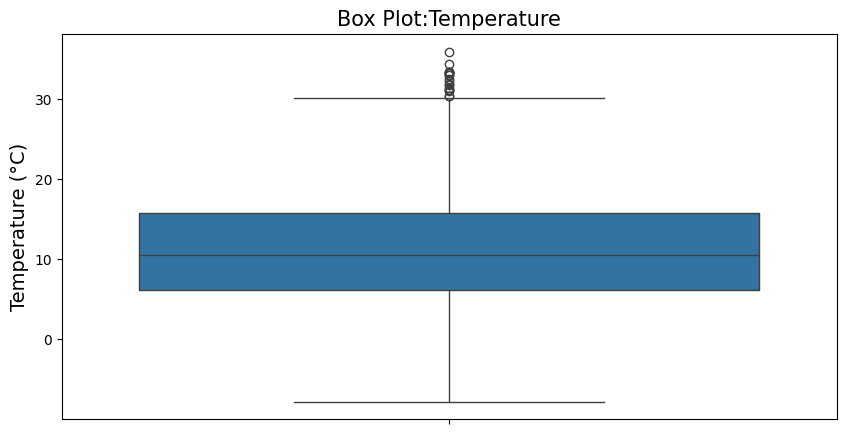

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.temp)
plt.title('Box Plot:Temperature', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

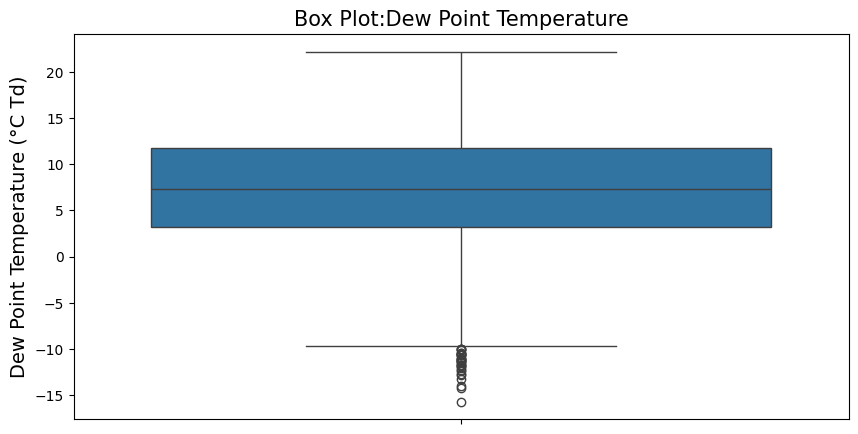

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.dwpt)
plt.title('Box Plot:Dew Point Temperature', fontsize=15)
plt.ylabel('Dew Point Temperature (°C Td)', fontsize=14)
plt.show()

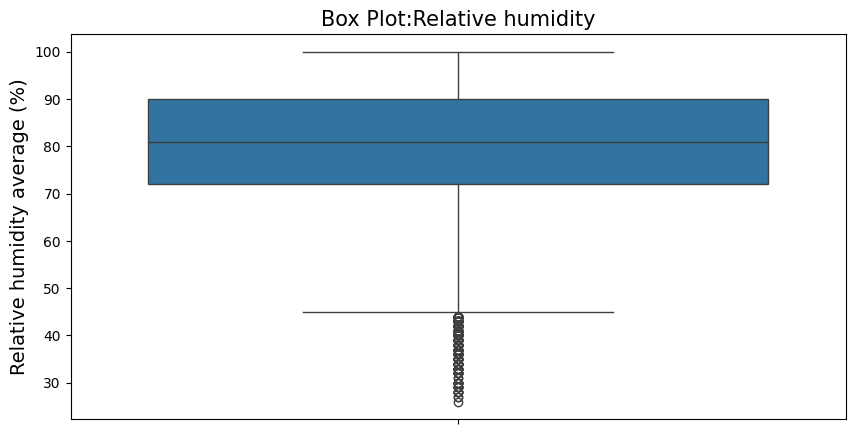

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.rhum)
plt.title('Box Plot:Relative humidity', fontsize=15)
plt.ylabel('Relative humidity average (%)', fontsize=14)
plt.show()

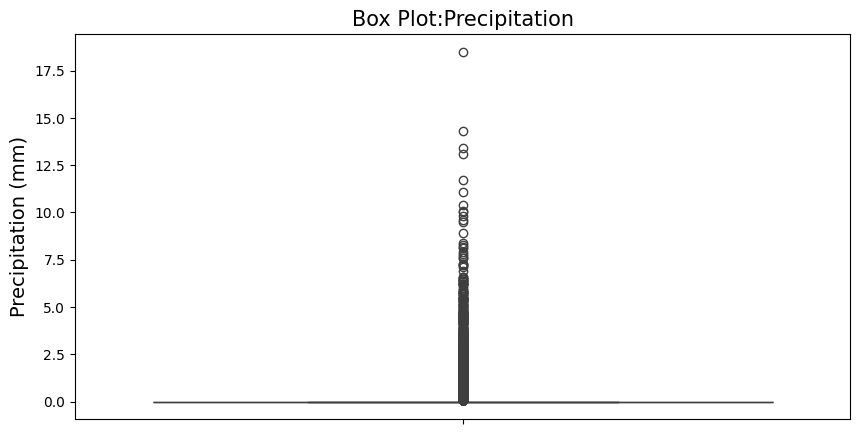

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.prcp)
plt.title('Box Plot:Precipitation', fontsize=15)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.show()

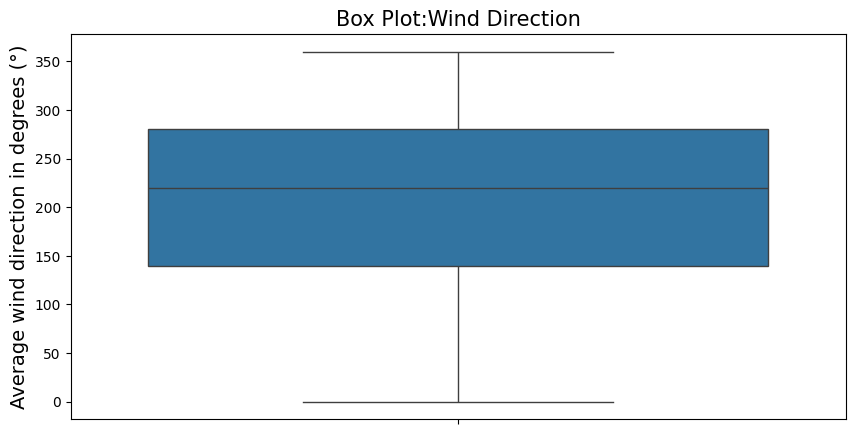

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.wdir)
plt.title('Box Plot:Wind Direction', fontsize=15)
plt.ylabel('Average wind direction in degrees (°)', fontsize=14)
plt.show()

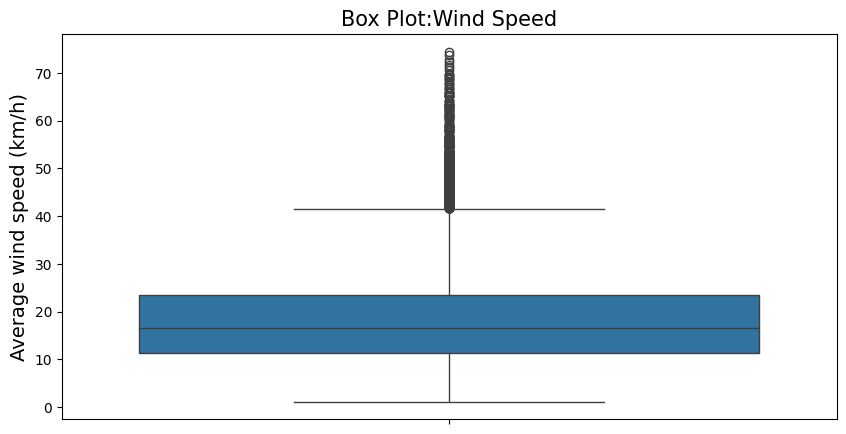

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.wspd)
plt.title('Box Plot:Wind Speed', fontsize=15)
plt.ylabel('Average wind speed (km/h)', fontsize=14)
plt.show()

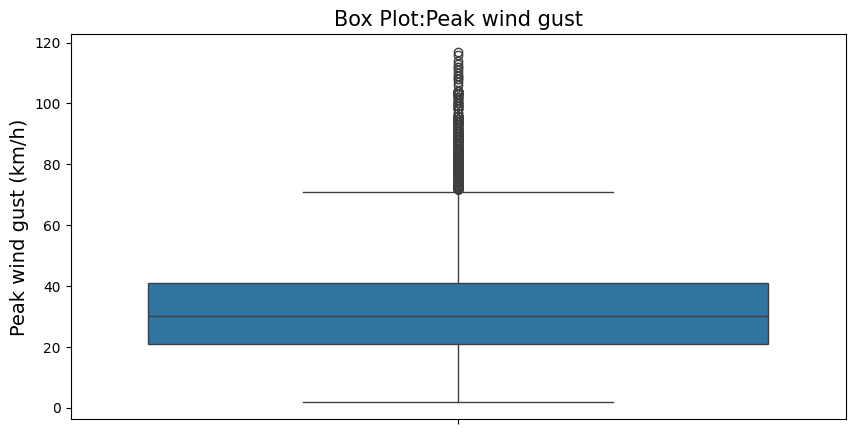

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.wpgt)
plt.title('Box Plot:Peak wind gust', fontsize=15)
plt.ylabel('Peak wind gust (km/h)', fontsize=14)
plt.show()

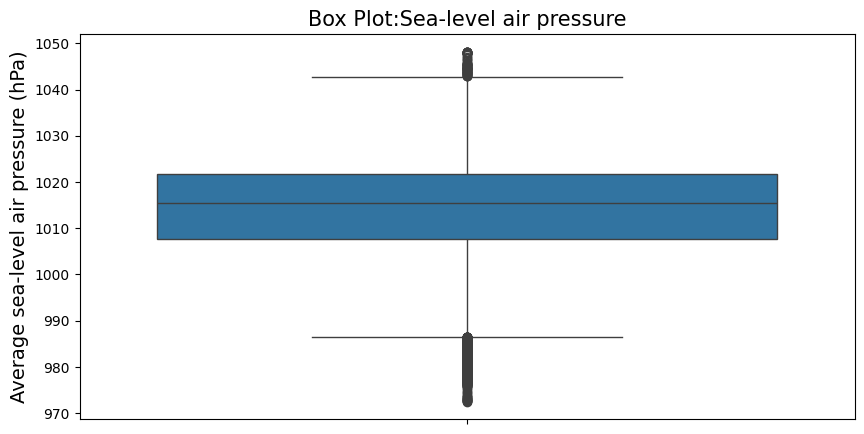

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.pres)
plt.title('Box Plot:Sea-level air pressure', fontsize=15)
plt.ylabel('Average sea-level air pressure (hPa)', fontsize=14)
plt.show()

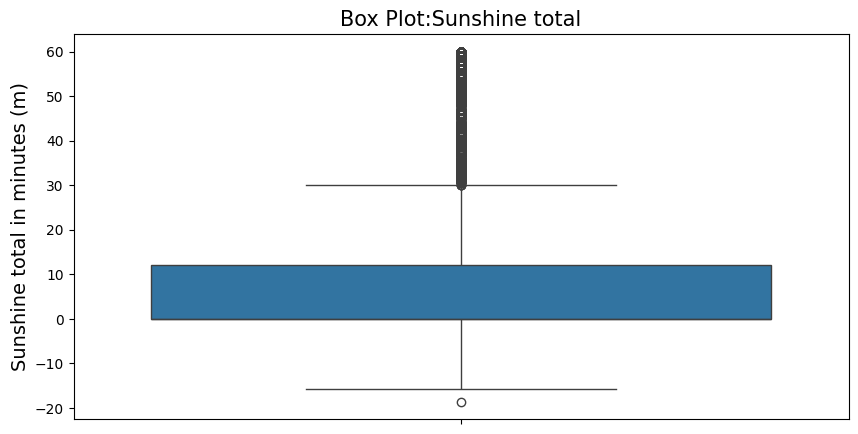

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.tsun)
plt.title('Box Plot:Sunshine total', fontsize=15)
plt.ylabel('Sunshine total in minutes (m)', fontsize=14)
plt.show()

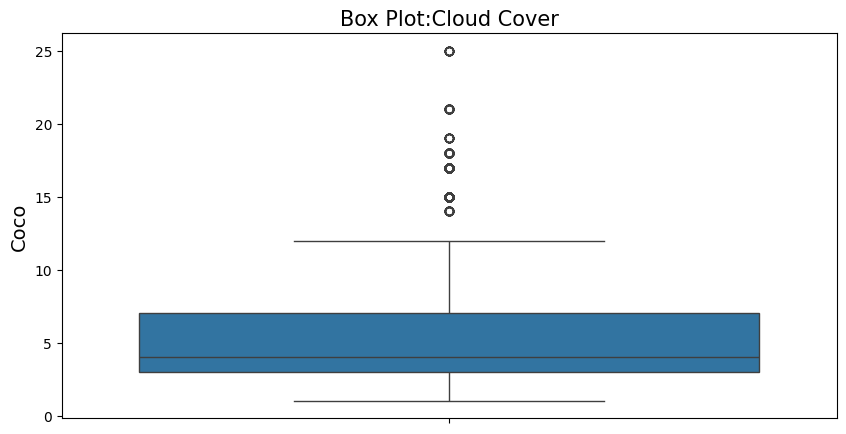

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(cux_df.coco)
plt.title('Box Plot:Cloud Cover', fontsize=15)
plt.ylabel('Coco', fontsize=14)
plt.show()

APPLYING LOF ON WEATHER DATA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20

# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in cux_df.columns:
# Reshape the data for LOF
 X = cux_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in Cuxhaven weather in  {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in Cuxhaven weather in  temp: 0.30%
Percentage of outliers in Cuxhaven weather in  dwpt: 0.26%
Percentage of outliers in Cuxhaven weather in  rhum: 0.05%
Percentage of outliers in Cuxhaven weather in  prcp: 0.03%
Percentage of outliers in Cuxhaven weather in  wdir: 0.32%
Percentage of outliers in Cuxhaven weather in  wspd: 0.26%
Percentage of outliers in Cuxhaven weather in  wpgt: 0.46%
Percentage of outliers in Cuxhaven weather in  pres: 0.75%
Percentage of outliers in Cuxhaven weather in  tsun: 0.60%
Percentage of outliers in Cuxhaven weather in  coco: 0.11%


NAIVE BAYES FOR WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Extract features
X = cux_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = gnb.var_
likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_cux_df =cux_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(cux_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in cux_df.columns:
    feature_anomalies_count = (anomalies_cux_df[feature] != cux_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")

Number of anomalies detected: 4383
Percentage of anomalies for each feature:
temp: 9.93%
dwpt: 9.96%
rhum: 9.78%
prcp: 3.22%
wdir: 9.73%
wspd: 9.87%
wpgt: 9.80%
pres: 9.96%
tsun: 4.72%
coco: 8.75%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in cux_df.columns:
    # Extract the feature values
    X = cux_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(cux_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: temp
  Number of anomalies detected: 1909
  Percentage of anomalies: 4.36%
Feature: dwpt
  Number of anomalies detected: 1667
  Percentage of anomalies: 3.80%
Feature: rhum
  Number of anomalies detected: 1984
  Percentage of anomalies: 4.53%
Feature: prcp
  Number of anomalies detected: 2238
  Percentage of anomalies: 5.11%
Feature: wdir
  Number of anomalies detected: 1455
  Percentage of anomalies: 3.32%
Feature: wspd
  Number of anomalies detected: 2360
  Percentage of anomalies: 5.39%
Feature: wpgt
  Number of anomalies detected: 2358
  Percentage of anomalies: 5.38%
Feature: pres
  Number of anomalies detected: 2482
  Percentage of anomalies: 5.66%
Feature: tsun
  Number of anomalies detected: 5749
  Percentage of anomalies: 13.12%
Feature: coco
  Number of anomalies detected: 787
  Percentage of anomalies: 1.80%


AUTOENCODER MODEL ON WEATHER

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_w = cux_df.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_w = pd.DataFrame(index=cux_df.index)

# Loop through each feature
for feature in features_auto_w :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_w  = scaler.fit_transform(cux_df[[feature]])

    # Define the autoencoder model
    model_auto_w  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_w .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_w.fit(scaled_feature_auto_w , scaled_feature_auto_w , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_w  = model_auto_w.predict(scaled_feature_auto_w )
    reconstruction_loss_auto_w  = np.mean(np.square(scaled_feature_auto_w  - reconstructed_feature_auto_w ), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_w [feature] = reconstruction_loss_auto_w



1370/1370 [==============================] - 2s 1ms/step


In [ ]:

print(reconstruction_loss_auto_w)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_w = np.percentile(reconstruction_loss_auto_w, 90)

    # Identify anomalies
anomalies_auto_w = reconstruction_loss_auto_w > threshold_auto_w

for feature in features_auto_w:
    anomalies_auto_w = anomaly_scores_auto_w[feature] > threshold_auto_w
    anomaly_percentage_auto_w = np.mean(anomalies_auto_w) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_w:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_w[feature] = reconstruction_loss_auto_w


# Combine anomaly scores with original data for easier analysis
combined_data_auto_w = pd.concat([cux_df, anomaly_scores_auto_w.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_w.to_csv('cux_df_with_anomaly_scores_auto_w.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_w.head()

[1.27524930e-09 1.27524930e-09 1.27524930e-09 ... 1.27524930e-09
 6.86399213e-08 2.60177232e-08]
Feature: temp, Anomaly Percentage: 12.80%
Feature: dwpt, Anomaly Percentage: 58.43%
Feature: rhum, Anomaly Percentage: 25.09%
Feature: prcp, Anomaly Percentage: 0.36%
Feature: wdir, Anomaly Percentage: 75.20%
Feature: wspd, Anomaly Percentage: 32.40%
Feature: wpgt, Anomaly Percentage: 45.95%
Feature: pres, Anomaly Percentage: 8.86%
Feature: tsun, Anomaly Percentage: 12.65%
Feature: coco, Anomaly Percentage: 5.89%


,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco,temp_anomaly_score,dwpt_anomaly_score,rhum_anomaly_score,prcp_anomaly_score,wdir_anomaly_score,wspd_anomaly_score,wpgt_anomaly_score,pres_anomaly_score,tsun_anomaly_score,coco_anomaly_score
0,8.2,5.3,82.0,0.0,250.0,28.4,56.0,1024.5,0.0,4.0,1.835492e-09,0.000004,3.492098e-09,5.241512e-09,0.000005,5.428963e-07,4.694078e-08,4.517380e-07,6.904586e-07,1.275249e-09
1,7.9,5.4,84.0,0.0,250.0,28.8,56.0,1023.6,0.0,4.0,1.098819e-07,0.000004,1.722061e-07,5.241512e-09,0.000005,9.024795e-07,4.694078e-08,9.481805e-08,6.904586e-07,1.275249e-09
2,8.2,5.8,85.0,0.0,250.0,32.4,62.0,1023.1,0.0,4.0,1.835492e-09,0.000004,2.384202e-07,5.241512e-09,0.000005,2.881826e-06,3.787021e-06,1.285920e-12,6.904586e-07,1.275249e-09
3,7.9,6.2,89.0,0.0,250.0,37.1,67.0,1022.1,0.0,7.0,1.098819e-07,0.000004,9.340424e-07,5.241512e-09,0.000005,3.494901e-07,9.132121e-06,7.006495e-07,6.904586e-07,6.863992e-08
4,7.6,6.9,95.0,0.0,250.0,38.5,70.0,1021.0,0.0,8.0,3.111846e-07,0.000003,5.262639e-06,5.241512e-09,0.000005,8.620381e-09,1.019319e-05,1.396449e-06,6.904586e-07,2.601772e-08


In [ ]:
cux_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    43824 non-null  float64
 1   dwpt    43824 non-null  float64
 2   rhum    43824 non-null  float64
 3   prcp    43824 non-null  float64
 4   wdir    43824 non-null  float64
 5   wspd    43824 non-null  float64
 6   wpgt    43824 non-null  float64
 7   pres    43824 non-null  float64
 8   tsun    43824 non-null  float64
 9   coco    43824 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


XGBOOST ON WEATHER DATASET

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(cux_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: temp
Threshold: 0.2324
Anomalies detected: 1546/43824 (3.53%)
----------------------------------------
Feature: dwpt
Threshold: 0.2387
Anomalies detected: 1501/43824 (3.43%)
----------------------------------------
Feature: rhum
Threshold: 2.0907
Anomalies detected: 1925/43824 (4.39%)
----------------------------------------
Feature: prcp
Threshold: 0.5600
Anomalies detected: 1280/43824 (2.92%)
----------------------------------------
Feature: wdir
Threshold: 127.4558
Anomalies detected: 2388/43824 (5.45%)
----------------------------------------
Feature: wspd
Threshold: 3.5613
Anomalies detected: 1748/43824 (3.99%)
----------------------------------------
Feature: wpgt
Threshold: 6.0336
Anomalies detected: 1735/43824 (3.96%)
----------------------------------------
Feature: pres
Threshold: 14.6230
Anomalies detected: 2147/43824 (4.90%)
----------------------------------------
Feature: tsun
Threshold: 26.4913
Anomalies detected: 2667/43824 (6.09%)
-----------------------------

IRRADIATION DATASET

In [ ]:
import pandas as pd
import requests
#importing irradiation data for CUXHAVEN
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=irradiationdataforcities&start=2019-01-01&end=2023-12-31&cityName=Cuxhaven"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    data = response.json()

    # Convert the data to a DataFrame
    df_irrad = pd.DataFrame.from_dict(data, orient='index')


else:
    print("Failed to fetch data. Status code:", response.status_code)


In [ ]:
df_irrad.head()

,time,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability,cityName
1546300800000,2019-01-01 00:00:00,2019-01-01T00:00:00.0/2019-01-01T00:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Cuxhaven
1546301700000,2019-01-01 00:15:00,2019-01-01T00:15:00.0/2019-01-01T00:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Cuxhaven
1546302600000,2019-01-01 00:30:00,2019-01-01T00:30:00.0/2019-01-01T00:45:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Cuxhaven
1546303500000,2019-01-01 00:45:00,2019-01-01T00:45:00.0/2019-01-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Cuxhaven
1546304400000,2019-01-01 01:00:00,2019-01-01T01:00:00.0/2019-01-01T01:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Cuxhaven


In [ ]:

# drop unwanted columns
clean_df = df_irrad.drop(columns = ["time", "Observation period", "Reliability", "cityName"])
df_irrad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                175296 non-null  object 
 1   Observation period  175296 non-null  object 
 2   TOA                 175296 non-null  object 
 3   Clear sky GHI       175296 non-null  object 
 4   Clear sky BHI       175296 non-null  object 
 5   Clear sky DHI       175296 non-null  object 
 6   Clear sky BNI       175296 non-null  object 
 7   GHI                 175296 non-null  float64
 8   BHI                 175296 non-null  object 
 9   DHI                 175296 non-null  object 
 10  BNI                 175296 non-null  object 
 11  Reliability         175296 non-null  object 
 12  cityName            175296 non-null  object 
dtypes: float64(1), object(12)
memory usage: 18.7+ MB


In [ ]:
#Get the percentage of null values in the dataset
clean_df.isnull().sum() /len(clean_df) *(100)

TOA              0.0
Clear sky GHI    0.0
Clear sky BHI    0.0
Clear sky DHI    0.0
Clear sky BNI    0.0
GHI              0.0
BHI              0.0
DHI              0.0
BNI              0.0
dtype: float64

In [ ]:
clean_df.head(200)

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...
1546476300000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546477200000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546478100000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546479000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:

# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = clean_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


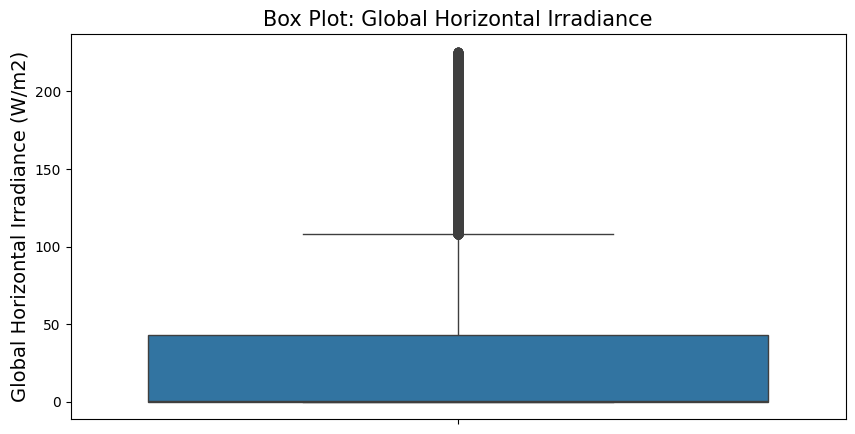

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.GHI)
plt.title('Box Plot: Global Horizontal Irradiance', fontsize=15)
plt.ylabel('Global Horizontal Irradiance (W/m2)', fontsize=14)
plt.show()

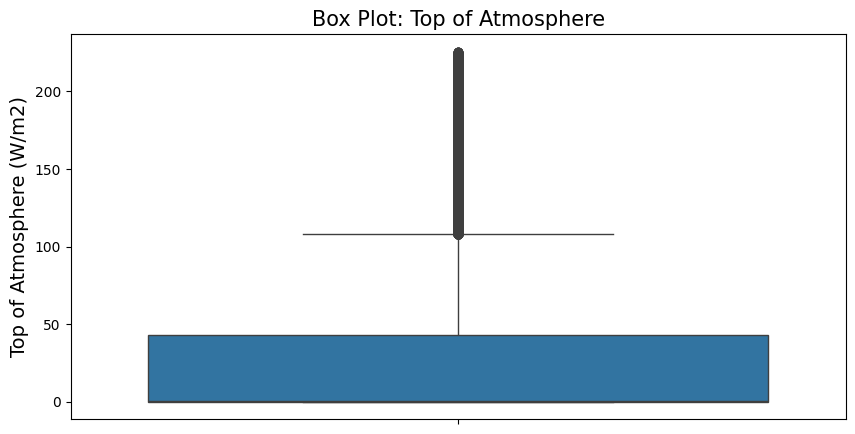

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.GHI)
plt.title('Box Plot: Top of Atmosphere', fontsize=15)
plt.ylabel('Top of Atmosphere (W/m2)', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20

# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in clean_df.columns:
# Reshape the data for LOF
 X = clean_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in cuxhaven irradiation in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in cuxhaven irradiation in TOA: 0.03%
Percentage of outliers in cuxhaven irradiation in Clear sky GHI: 0.01%
Percentage of outliers in cuxhaven irradiation in Clear sky BHI: 0.11%
Percentage of outliers in cuxhaven irradiation in Clear sky DHI: 0.01%
Percentage of outliers in cuxhaven irradiation in Clear sky BNI: 0.02%
Percentage of outliers in cuxhaven irradiation in GHI: 0.02%
Percentage of outliers in cuxhaven irradiation in BHI: 0.18%
Percentage of outliers in cuxhaven irradiation in DHI: 0.01%
Percentage of outliers in cuxhaven irradiation in BNI: 0.05%


USING NAIVE BAYES ON THE IRRADIATION DATASET


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Step 1: Check and Convert Data Types
# Convert all columns to numeric (float64)
clean_df =  clean_df.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle Missing Values
clean_df =  clean_df.dropna()  # Drop rows with NaN values

# Extract features
X =  clean_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = np.var(X, axis=0) + 1e-9  # Adding a small value for numerical stability

likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_clean_df =  clean_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len( clean_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in  clean_df.columns:
    feature_anomalies_count = (anomalies_clean_df[feature] !=  clean_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 17530
Percentage of anomalies for each feature:
TOA: 10.00%
Clear sky GHI: 10.00%
Clear sky BHI: 10.00%
Clear sky DHI: 10.00%
Clear sky BNI: 10.00%
GHI: 10.00%
BHI: 9.99%
DHI: 10.00%
BNI: 9.99%


In [ ]:
cuhx_df = clean_df.select_dtypes(include=['object']).astype('float')
cuhx_df['GHI'] = clean_df['GHI']
cuhx_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   GHI     175296 non-null  float64
dtypes: float64(1)
memory usage: 2.7+ MB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in cuhx_df.columns:
    # Extract the feature values
    X = cuhx_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(cuhx_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: GHI
  Number of anomalies detected: 17093
  Percentage of anomalies: 9.75%


AUTOENCODER MODEL FOR IRRADIATION

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_i = clean_df.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_i = pd.DataFrame(index=clean_df.index)

# Loop through each feature
for feature in features_auto_i :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_i  = scaler.fit_transform(clean_df[[feature]])

    # Define the autoencoder model
    model_auto_i  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_i .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_i.fit(scaled_feature_auto_i , scaled_feature_auto_i , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_i  = model_auto_i.predict(scaled_feature_auto_i)
    reconstruction_loss_auto_i  = np.mean(np.square(scaled_feature_auto_i  - reconstructed_feature_auto_i), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_i [feature] = reconstruction_loss_auto_i



5478/5478 [==============================] - 9s 2ms/step


In [ ]:

print(reconstruction_loss_auto_i)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

    # Identify anomalies
anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

for feature in features_auto_i:
    anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
    anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# Combine anomaly scores with original data for easier analysis
combined_data_auto_i = pd.concat([clean_df, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_i.to_csv('clean_df_with_anomaly_scores_auto_i.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_i.head()






[4.11972628e-08 4.11972628e-08 4.11972628e-08 ... 4.11972628e-08
 4.11973455e-08 4.11973455e-08]
Feature: TOA, Anomaly Percentage: 23.97%
Feature: Clear sky GHI, Anomaly Percentage: 6.79%
Feature: Clear sky BHI, Anomaly Percentage: 42.86%
Feature: Clear sky DHI, Anomaly Percentage: 0.13%
Feature: Clear sky BNI, Anomaly Percentage: 2.81%
Feature: GHI, Anomaly Percentage: 3.57%
Feature: BHI, Anomaly Percentage: 0.20%
Feature: DHI, Anomaly Percentage: 0.67%
Feature: BNI, Anomaly Percentage: 10.00%


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,TOA_anomaly_score,Clear sky GHI_anomaly_score,Clear sky BHI_anomaly_score,Clear sky DHI_anomaly_score,Clear sky BNI_anomaly_score,GHI_anomaly_score,BHI_anomaly_score,DHI_anomaly_score,BNI_anomaly_score
1546300800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417327e-07,1.652941e-08,1.230095e-08,9.429585e-09,2.243243e-09,7.883475e-09,1.298674e-08,5.022474e-09,4.119726e-08
1546301700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417327e-07,1.652941e-08,1.230095e-08,9.429585e-09,2.243243e-09,7.883475e-09,1.298674e-08,5.022474e-09,4.119726e-08
1546302600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417327e-07,1.652941e-08,1.230095e-08,9.429585e-09,2.243243e-09,7.883475e-09,1.298674e-08,5.022474e-09,4.119726e-08
1546303500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417327e-07,1.652941e-08,1.230095e-08,9.429585e-09,2.243243e-09,7.883475e-09,1.298674e-08,5.022474e-09,4.119726e-08
1546304400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417327e-07,1.652941e-08,1.230095e-08,9.429585e-09,2.243243e-09,7.883475e-09,1.298674e-08,5.022474e-09,4.119726e-08


In [ ]:
result = (cuxh_df['GHI'] == 0.0)

NameError: name 'cuxh_df' is not defined

In [ ]:
round((len(cuxh_df[result])/len(cuxh_df)) *100, 2)

XGBOOST ON IRRADIATION

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(cuxh_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")
